<a href="https://colab.research.google.com/github/Raushan787/IPR/blob/main/Oil_well_IPR_using_Fetkovich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



In [2]:
#Give data from Tarek Ahmed book example->7-9
Pr=3600 #psi
Prf=2000 #psi after pressure decline
Pwf=np.array([3170,2890,2440,2150]) #psi
Qo=np.array([263,383,497,640]) #stb/day

In [3]:
#Calculation (Pr**2-Pwf**2)
result=Pr**2-Pwf**2

result

array([2911100, 4607900, 7006400, 8337500])

In [4]:
df=pd.DataFrame({"Pwf":Pwf,"Qo":Qo,"(Pr**2-Pwf**2)":result})
df

,Pwf,Qo,(Pr**2-Pwf**2)
0,3170,263,2911100
1,2890,383,4607900
2,2440,497,7006400
3,2150,640,8337500


In [7]:
#Perform linear regression in log-log space
log_Qo=np.log(Qo)
log_result=np.log(result)
linear_reg=LinearRegression()
linear_reg=linear_reg.fit(log_Qo.reshape(-1,1),log_result.reshape(-1,1))

In [12]:
slope=linear_reg.coef_[0]
slope

array([1.22643043])

In [13]:
#Find out c and n
n=1/slope
c=Qo[0]/(Pr**2-Pwf[0]**2)**n

n,c


(array([0.81537442]), array([0.00141036]))

In [14]:
#Create an array of Pwf values from Pressure reservoir down to 0 for initial reservoir condition Pr=3600 psi
Pwf_values=np.arange(Pr,-1,-1)
Pwf_values

array([3600, 3599, 3598, ...,    2,    1,    0])

In [15]:

#Calculation of Qo for Pwf values for initial reservoir condition Pr=3600 psi
Qo_values=c*(Pr**2-Pwf_values**2)**n
AOF=c*(Pr**2)**n  #Absolute open flow when Pwf=0 psi
AOF

array([888.72029307])

In [16]:
df_p=pd.DataFrame({"Pwf":Pwf_values,"Qo":Qo_values})
df_p.head()

,Pwf,Qo
0,3600,0.000000
1,3599,1.969926
2,3598,3.466195
3,3597,4.823742
4,3596,6.098271


In [17]:
#Future IPR after pressure depletion to Pr=2000 psi
c_f=c*Prf/Pr
c_f

array([0.00078353])

In [18]:

Pwf_f=np.arange(Prf,-1,-1)
Qo_f=c_f*(Prf**2-Pwf_f**2)**n
AOF_f=c_f*(Prf**2)**n
AOF_f


array([189.32468849])

In [19]:
df_f=pd.DataFrame({"Pwf_f":Pwf_f,"Qo_f":Qo_f})
df_f.head()

,Pwf_f,Qo_f
0,2000,0.000000
1,1999,0.677634
2,1998,1.192227
3,1997,1.659017
4,1996,2.097172


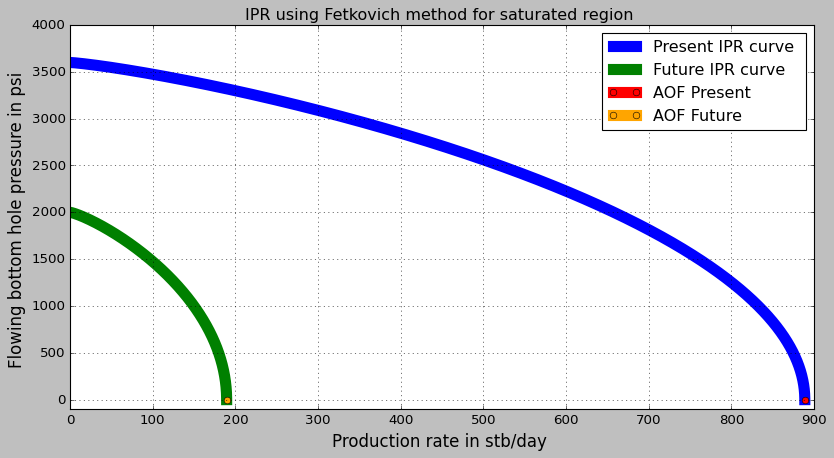

In [24]:
#Create plot
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.plot(Qo_values,Pwf_values,label='Present IPR curve ',linewidth=10,c="b")
plt.plot(Qo_f,Pwf_f,label='Future IPR curve',linewidth=10,c="g")
plt.plot(AOF,0,label="AOF Present",marker="o",c="r",linewidth=10)
plt.plot(AOF_f,0,label="AOF Future ",marker="o",color="orange",lw=10)
plt.ylim(-100,4000)
plt.title("IPR using Fetkovich method for saturated region ")
plt.xlabel("Production rate in stb/day ",size=15)
plt.ylabel("Flowing bottom hole pressure in psi ",size=15)
plt.grid()
plt.legend()
plt.show()